# Jupyter Notebook for Making Ablation Plots

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [57]:
# Define function for if result ends up being a 1D array of length n
# or a 2D array of length 1 containing such 1D array
def clean_npy(npy_file_path):
    loaded_npy = np.load(npy_file_path)
    if len(loaded_npy) == 1:
        return loaded_npy[0]
    else:
        return loaded_npy

## Plotting for Each Optimization Method

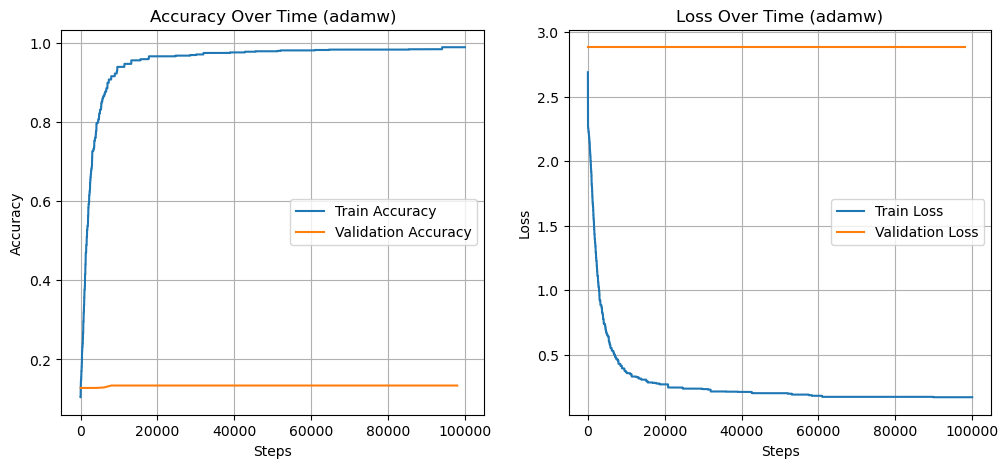

<Figure size 640x480 with 0 Axes>

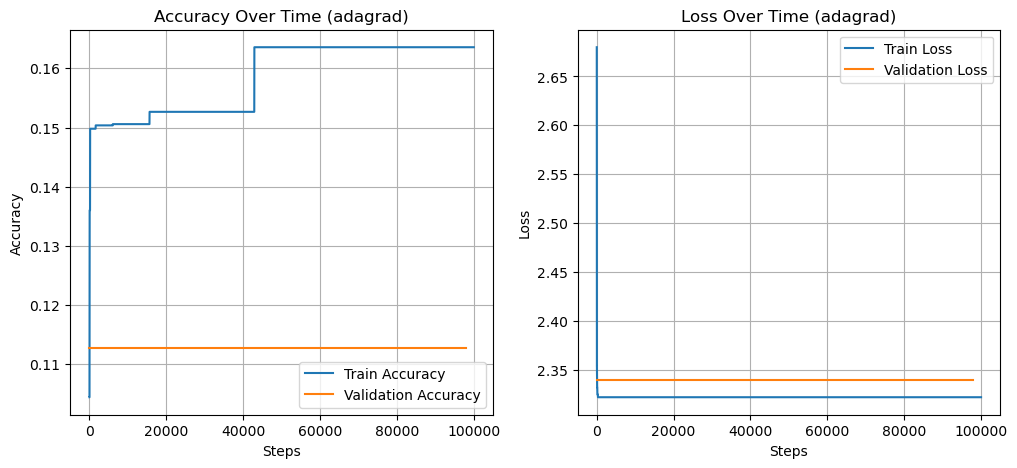

<Figure size 640x480 with 0 Axes>

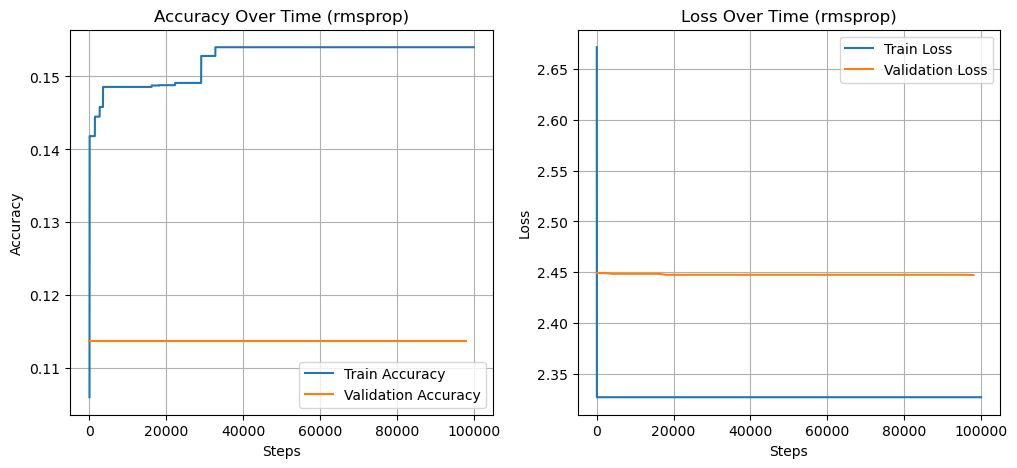

<Figure size 640x480 with 0 Axes>

In [68]:
# Set run_opt value (1, 2, 3, or 4)
opt_map = {1: "adam", 2: "adamw", 3: "adagrad", 4: "rmsprop"}

for i in [2, 3, 4]:
    # Find the optimization method
    opt_method = opt_map[i]
    
    # Import the result values for that method
    train_acc = clean_npy(f"grok_train_acc_opt{i}.npy")
    train_losses = clean_npy(f"grok_train_losses_opt{i}.npy")
    val_acc = clean_npy(f"grok_val_acc_opt{i}.npy")
    val_losses = clean_npy(f"grok_val_losses_opt{i}.npy")
    
    # For each step, calculate the maximum accuracy/minimum loss
    # up to that step.
    best_train_acc = np.maximum.accumulate(train_acc)
    best_val_acc = np.maximum.accumulate(val_acc)
    best_train_loss = np.minimum.accumulate(train_losses)
    best_val_loss = np.minimum.accumulate(val_losses)
    
    # Plotting begins!
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot accuracy
    train_steps = np.arange(len(train_acc))           
    val_steps = np.arange(len(val_acc)) * 2000 
    
    ax1.plot(train_steps, best_train_acc, label="Train Accuracy")
    ax1.plot(val_steps, best_val_acc, label="Validation Accuracy")
    ax1.set_title(f"Accuracy Over Time ({opt_method})")
    ax1.set_xlabel("Steps")
    ax1.set_ylabel("Accuracy")
    ax1.legend()
    ax1.grid(True)
    
    # Plot loss
    ax2.plot(train_steps, best_train_loss, label="Train Loss")
    ax2.plot(val_steps, best_val_loss, label="Validation Loss")
    ax2.set_title(f"Loss Over Time ({opt_method})")
    ax2.set_xlabel("Steps")
    ax2.set_ylabel("Loss")
    ax2.legend()
    ax2.grid(True)
    
    # Show figure in console
    plt.show()
    
    # Save the figure by running the code below!
    plt.tight_layout()
    plt.savefig(f"accuracy_and_loss_opt{i}_{opt_method}.png")

# Comparing Same Metric Across Methods

Saved plot as 'method_comparison_overlayed.png'


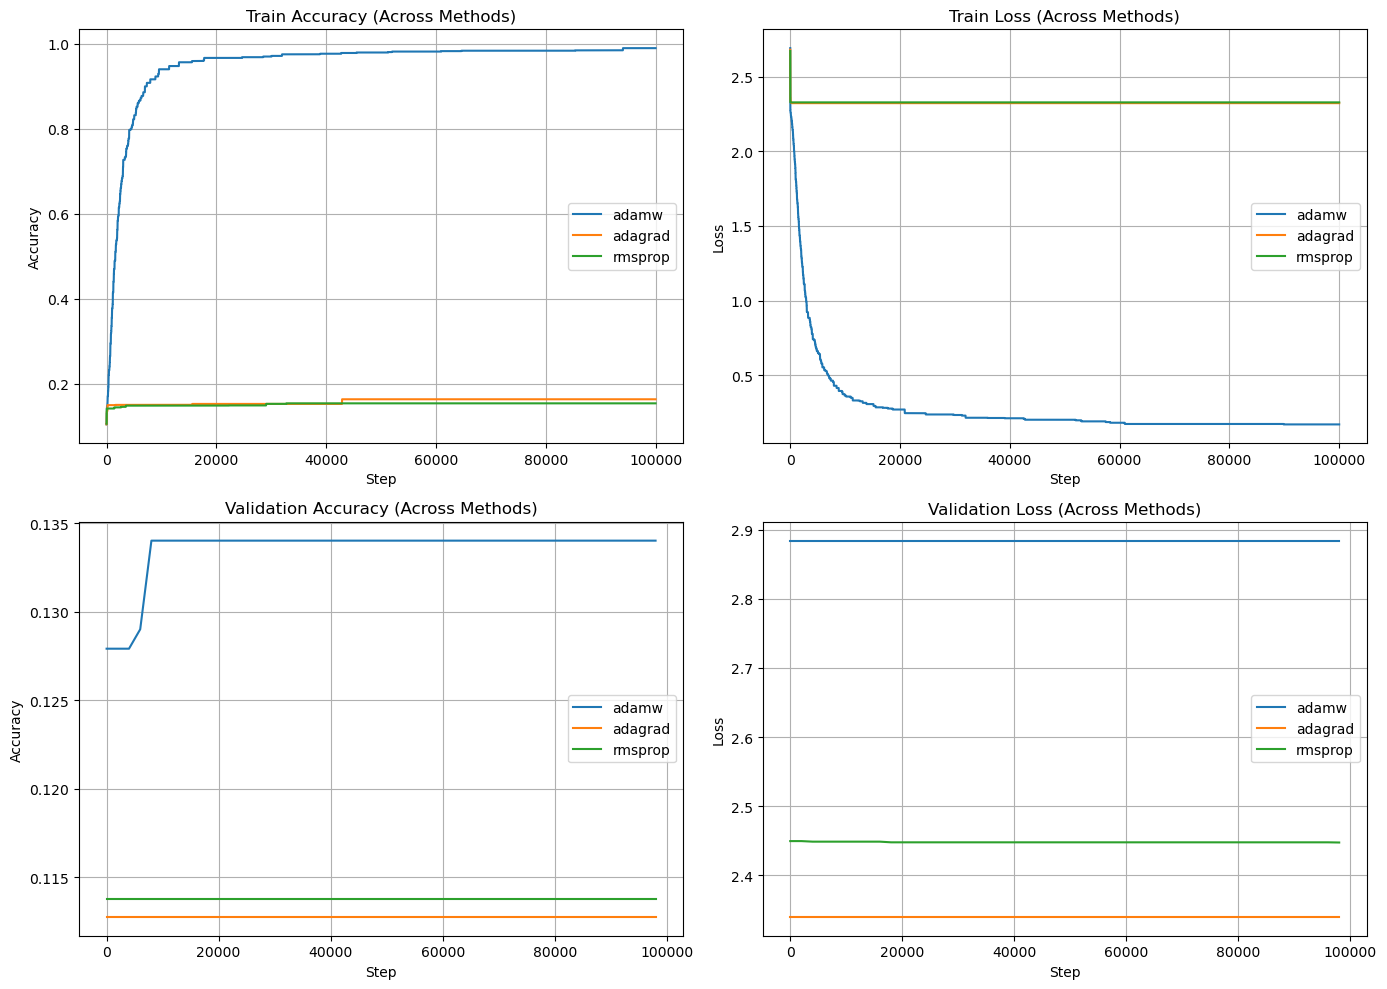

In [67]:
opt_map = {1: "adam", 2: "adamw", 3: "adagrad", 4: "rmsprop"}

# Number of methods
method_ids = [2, 3, 4] # [1, 2, 3, 4]

# Create subplots (2 rows × 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Iterate over each method and subplot index
for idx, method_id in enumerate(method_ids):
    # Load arrays
    train_acc = clean_npy(f"grok_train_acc_opt{method_id}.npy")
    val_acc = clean_npy(f"grok_val_acc_opt{method_id}.npy")
    train_losses = clean_npy(f"grok_train_losses_opt{method_id}.npy")
    val_losses = clean_npy(f"grok_val_losses_opt{method_id}.npy")

    # For each step, calculate the maximum accuracy/minimum loss
    # up to that step.
    best_train_acc = np.maximum.accumulate(train_acc)
    best_val_acc = np.maximum.accumulate(val_acc)
    best_train_loss = np.minimum.accumulate(train_losses)
    best_val_loss = np.minimum.accumulate(val_losses)

    # Steps
    train_steps = np.arange(len(train_acc))
    val_steps = np.arange(len(val_acc)) * 2000

    # Plot on the shared subplots
    axes[0, 0].plot(train_steps, best_train_acc, label=opt_map[method_id])
    axes[0, 1].plot(best_train_loss, label=opt_map[method_id])
    axes[1, 0].plot(val_steps, best_val_acc, label=opt_map[method_id])
    axes[1, 1].plot(val_steps, best_val_loss, label=opt_map[method_id])

# Titles and labels
axes[0, 0].set_title("Train Accuracy (Across Methods)")
axes[0, 0].set_xlabel("Step")
axes[0, 0].set_ylabel("Accuracy")
axes[0, 0].legend()
axes[0, 0].grid(True)

axes[0, 1].set_title("Train Loss (Across Methods)")
axes[0, 1].set_xlabel("Step")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].legend()
axes[0, 1].grid(True)

axes[1, 0].set_title("Validation Accuracy (Across Methods)")
axes[1, 0].set_xlabel("Step")
axes[1, 0].set_ylabel("Accuracy")
axes[1, 0].legend()
axes[1, 0].grid(True)

axes[1, 1].set_title("Validation Loss (Across Methods)")
axes[1, 1].set_xlabel("Step")
axes[1, 1].set_ylabel("Loss")
axes[1, 1].legend()
axes[1, 1].grid(True)

# Finalize and save
plt.tight_layout()
plt.savefig("method_comparison_overlayed.png")
print("Saved plot as 'method_comparison_overlayed.png'")